<a href="https://colab.research.google.com/github/Pratibha65/email-spam-classifier/blob/main/Email_Spam_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
#General Libraries
import numpy as np
import pandas as pd
#NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('punkt_tab')
nltk.download('stopwords')
#ML Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report
#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#Utility Libraries
from collections import Counter
import string


# Download NLTK resources if not already available
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [ ]:
# 1. Data cleaning
# 2. EDA - Exploratory Data Analysis
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation

1. Data Cleaning

In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#Feature Extraction
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Encode target variable
df['target'] = df['target'].map({'ham': 0, 'spam': 1})

In [ ]:
# missing values
df.isnull().sum()

# check for duplicate values
df.duplicated().sum()

403

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(5169, 2)

In [ ]:
df['target'].value_counts()

,count
target,
0,4516
1,653


2. EDA

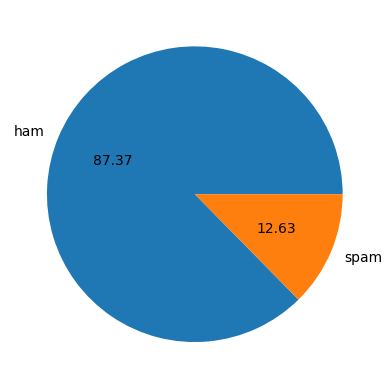

In [ ]:
#Ratio of spam and ham messages
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
# Add additional features
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

<Axes: xlabel='num_characters', ylabel='Count'>

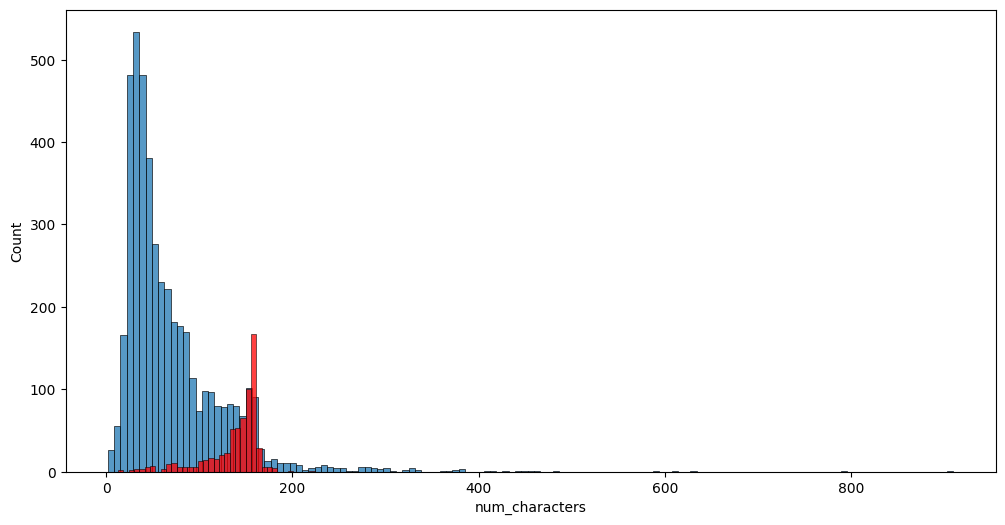

In [ ]:
#Classify characters on the basis of characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

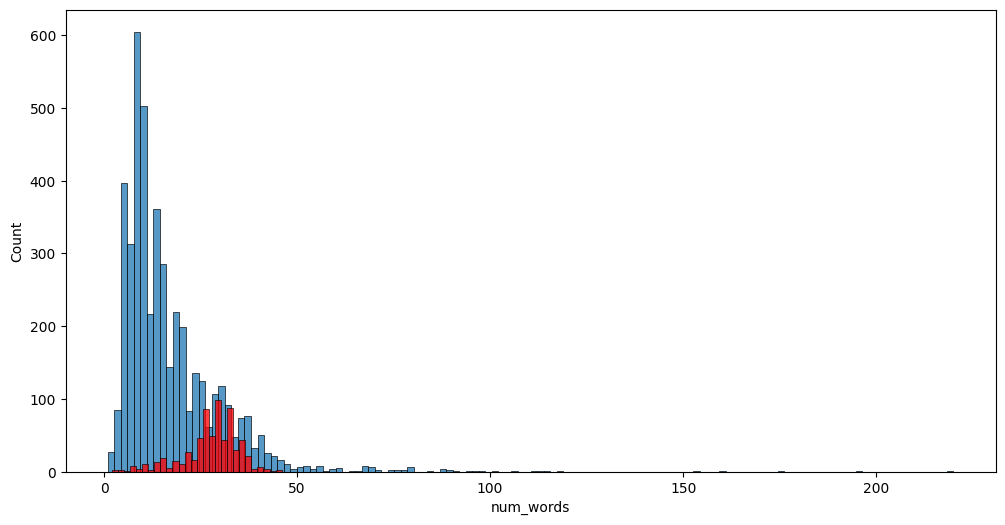

In [ ]:
#Classify characters on the basis of words
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

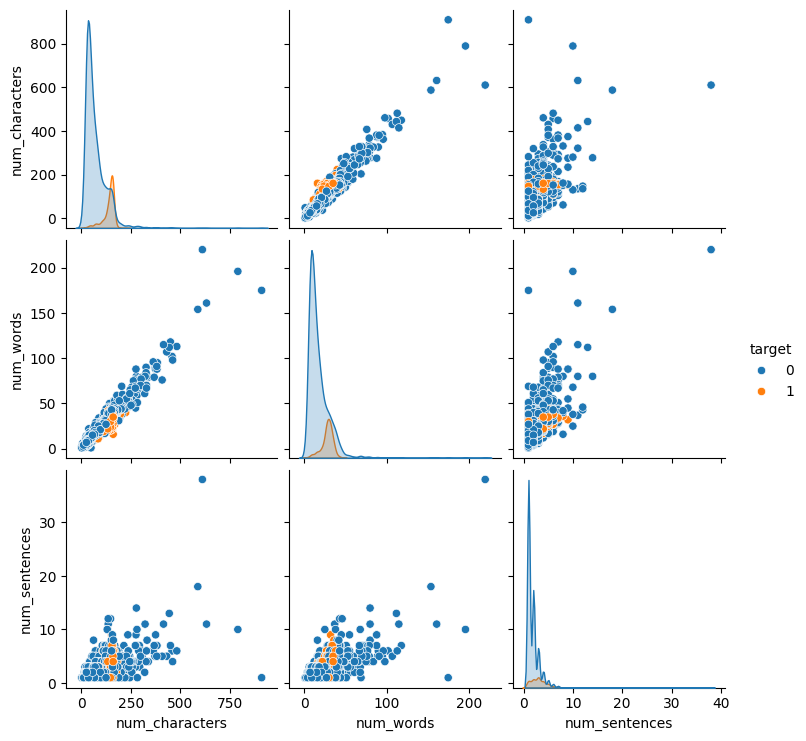

In [ ]:
sns.pairplot(df,hue='target')

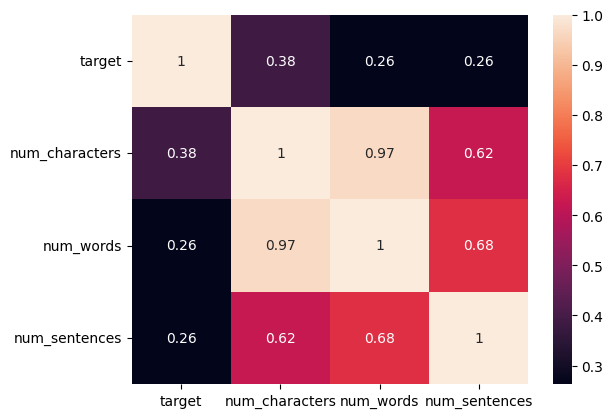

In [ ]:
# Calculate the correlation matrix only for numerical features
numerical_features = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_features].corr()

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.show()

3. Data Preprocessing

Lower Case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming

In [ ]:
def transform_text(text):
    ps = PorterStemmer()
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    text = nltk.word_tokenize(text)
    # Remove non-alphanumeric characters
    text = [word for word in text if word.isalnum()]
    # Remove stopwords and punctuation
    text = [word for word in text if word not in stopwords.words('english') and word not in string.punctuation]
    # Apply stemming
    text = [ps.stem(word) for word in text]
    return " ".join(text)

In [ ]:
# Transform text
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
def visualize_wordcloud(data, title):
    wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
    wordcloud = wc.generate(data)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

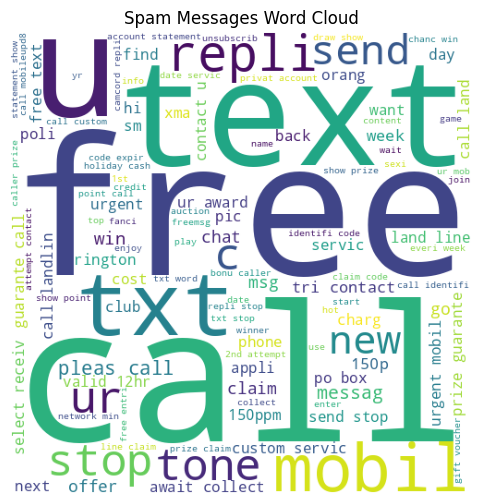

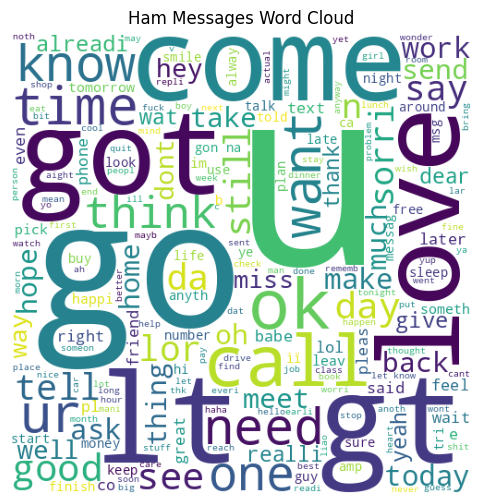

In [ ]:
# Visualize word clouds for spam and ham messages
spam_text = df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")
ham_text = df[df['target'] == 0]['transformed_text'].str.cat(sep=" ")
visualize_wordcloud(spam_text, "Spam Messages Word Cloud")
print()
visualize_wordcloud(ham_text, "Ham Messages Word Cloud")

In [ ]:
def visualize_most_common_words(corpus, title):
    counter = Counter(corpus)
    most_common = counter.most_common(30)
    df_common = pd.DataFrame(most_common, columns=['Word', 'Frequency'])
    sns.barplot(x='Word', y='Frequency', data=df_common)
    plt.xticks(rotation='vertical')
    plt.title(title)
    plt.show()

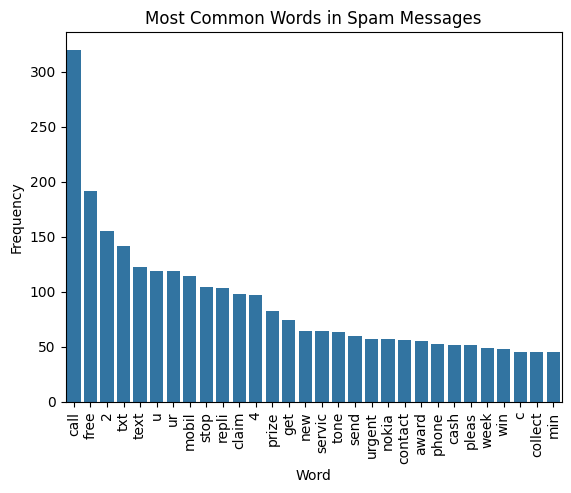

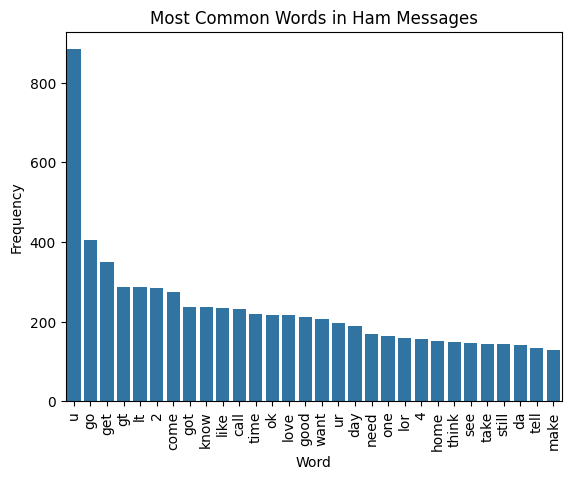

In [ ]:
# Visualize most common words in spam and ham messages
spam_corpus = [word for msg in df[df['target'] == 1]['transformed_text'] for word in msg.split()]
ham_corpus = [word for msg in df[df['target'] == 0]['transformed_text'] for word in msg.split()]
visualize_most_common_words(spam_corpus, "Most Common Words in Spam Messages")
visualize_most_common_words(ham_corpus, "Most Common Words in Ham Messages")

In [ ]:
# Convert text to numerical features using TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
# Train Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

In [ ]:
# Evaluate model performance
y_pred = rfc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.971953578336557
Precision: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.79      0.88       138

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [ ]:
dtc = DecisionTreeClassifier(random_state=2)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2)

In [ ]:
# Evaluate model performance
y_pred = dtc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9516441005802708
Precision: 0.8188405797101449

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       896
           1       0.82      0.82      0.82       138

    accuracy                           0.95      1034
   macro avg       0.90      0.90      0.90      1034
weighted avg       0.95      0.95      0.95      1034



In [ ]:
# Function to classify user input
def classify_message_RFC(message):
    transformed_message = transform_text(message)
    transformed_vector = tfidf.transform([transformed_message]).toarray()
    prediction = rfc.predict(transformed_vector)[0]
    return "Spam" if prediction == 1 else "Ham"

In [ ]:
def classify_message_DTC(message):
    ransformed_message = transform_text(message)
    transformed_vector = tfidf.transform([transformed_message]).toarray()
    prediction = dtc.predict(transformed_vector)[0]
    return "Spam" if prediction == 1 else "Ham"

In [ ]:
while True:
    user_input = input("Enter a message to classify (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        print("Exiting...")
        break
    print(f"The message is classified as: {classify_message_RFC(user_input)}")

Enter a message to classify (or type 'exit' to quit): exit
Exiting...


In [ ]:
import pickle

In [ ]:
pickle.dump(rfc,open('model.pkl','wb'))

In [ ]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))


In [ ]:
while True:
    user_input = input("Enter a message to classify (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        print("Exiting...")
        break
    print(f"The message is classified as: {classify_message_DTC(user_input)}")